In [1]:
from OpOp.Model import Hernquist, NFW, NbodyModel

In [2]:
#Stars
mstar=1e8
rc_star=2
rtrunc_star=20
ms=Hernquist(rc=rc_star,Ms=mstar,rt=rtrunc_star)
print(ms)


Model: Henquist
gamma: 1.00
beta: 4.00
rscale: 2.000
rt: 20.000 (physical)  10.000 (normalised)
rini: 0.000 (physical)  0.000 (normalised)
rfin: 600.000 (physical)  300.000 (normalised)
Mass: 1.000e+08 at scale radius rs: 600.000
Total Mass: 1.000e+08 at last radius: 600.000
use_c set to False
use_nparray set to False



In [3]:
#DM
Mvir=1e10
rtrunc_dm=40
mdm=NFW(Mc=Mvir,rt=rtrunc_dm)
print(mdm)


Model: NFW
concentration parameter: 200
Cosm parameters,  z:0.000   h:0.670  rhoc:124.586
c: 15.657
M200: 1.000e+10
r200: 45.758
rs: 2.923
rt: 40.000 (physical)  0.874 (normalised)
rini: 0.000 (physical)  0.000 (normalised)
rfin: 876.782 (physical)  300.000 (normalised)
Total Mass: 1.041e+10 at last radius: 876.782
use_c set to False
use_nparray set to False



In [4]:
#Nbody Model star
model_star={'type':1, 'model':ms,'npart':int(1e4)}
#Nbody Model DM
model_dm={'type':2, 'model':mdm,'npart':int(5e5)}
#Final model
a=NbodyModel([model_star,model_dm])
#Generate
p=a.generate(use_c=True, po=None,vo=None,mq=70,set_vel=True)

***Generate ICS: Start***
-Component id:0 type:1 Npart=10000
     Generate Positions:      Done
     Generate Velocities:      Done
     Done in 0.057
-Component id:1 type:2 Npart=500000
     Generate Positions:      Done
     Generate Velocities:      Done
     Done in 0.760


In [5]:
##Save Nbody model to FVFPS input file 
#Use the write_snap method from OpOp.io
from OpOp.io import write_snap
write_snap(p,filename='out00.bin',kind='fvfps')
#The main write_snap parameters are:
# particles: objected created from a NbodyModel 
# filename: filename for the saved output 
# kind: format for the outpt generation

##Generate the input file for fvfps 
#Use the function write_icparam_fvfps from OpOp.io 
from OpOp.io import write_icparam_fvfps
#The parameters are 
#theta (default 0.5)
#epsc  (default 0.01)
#isoft (default 1)
#noutput (default 1)
#iene (default 120)
#The above parameters are equivalent to the fvfps parameter (see the documentation) 
#The other parameters are 
#tmax (default 1) maximum time of the simulation in Gyr
#max_dt (dfault 0.001) largest allowed value of the time step  in Gyr
#poscm, Cartesian coordinates (x,y,z) of the centre of mass  of the Nbody realisation  (default (0,0,0)) in kpc
#velcm, Cartesian velocity coordinates (vx,vy,vz) of the centre of mass of the starting point of the Nbody realisation  (default (0,0,0)) in km/s
#epotential (default 'J95') external potential model to use 
###The output will be saved in the finel input.data that can be used directly as input parameter file for fvfps
###Notice that the method tranform the input times in Gyr directly in Nbody units, so inside input.data tmax and max_dt will not the same of the value used to call the function
tmax=1
dt=0.001
write_icparam_fvfps(tmax=tmax, max_dt=dt, epotential='J95', poscm=(0,0,0), velcm=(0,0,0))


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Reading particle data from out00.bin......
Done

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Sorting by Id
Sorted


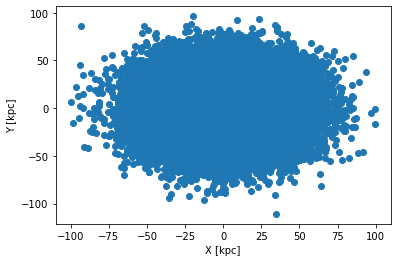

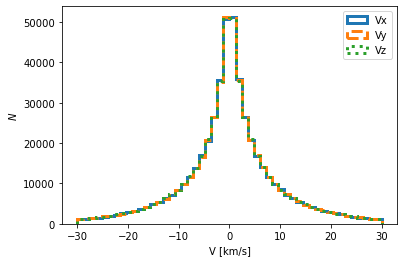

Id vector [     0      1      2 ... 509997 509998 509999]
type vector [1 1 1 ... 2 2 2]


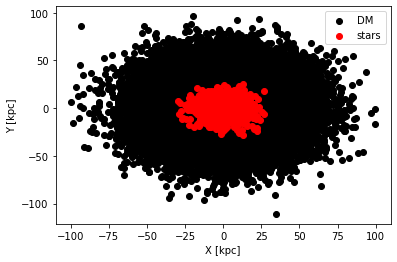

Centre of mass [kpc] [-0.02827776  0.03246213 -0.00886478]
Centre of mass velocity [km/s] [-0.02969141 -0.05767116 -0.05066637]


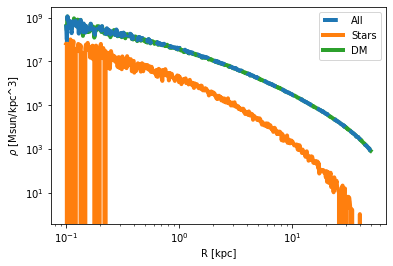

In [49]:
##Load binary output from fvfps 
#To load a binary output file from fvfps just use the method load_snap from OpOp.io 
from OpOp.io import load_snap
#the only parameter needed is filename, i.e. the complete path to the ouput file to read
pnbody=load_snap(filename="out00.bin")

#The output file is saved in a Particles objects (the same generated by the method generate of the class Nbody model)
#Give a look to the class Particles in the file partile_src/particle.pyt 

#Suggestion-1, to access the position just call the member Pos, it is a numpy array with dimensions N,3 where N is the 
#number of particles: each row rapresent a particle and each column a Cartsian coordinate x,y,z
import matplotlib.pyplot as plt
X=pnbody.Pos[:,0]
Y=pnbody.Pos[:,1]

plt.scatter(X,Y)
plt.xlabel("X [kpc]")
plt.ylabel("Y [kpc]")
plt.show()

#Suggestion-2, similarly to Pos, the member Vel contains the cartesian velocity of the particles 
Vx=pnbody.Pos[:,0]
Vy=pnbody.Pos[:,1]
Vz=pnbody.Pos[:,2]
plt.hist(Vx,histtype="step",bins=50,lw=3, range=(-30,30),label="Vx")
plt.hist(Vy,histtype="step",bins=50,lw=3, range=(-30,30),ls="dashed",label="Vy")
plt.hist(Vz,histtype="step",bins=50,lw=3, range=(-30,30),ls="dotted",label="Vz")
plt.xlabel("V [km/s]")
plt.ylabel("$N$")
plt.legend()
plt.show()

#Suggestion-3, the member Id is a 1D array containing the ID of all the particles, while the member Type contains a list of integer
#reporting the particle type (it depends on how you setup the models with Nbody, in the example above type 1 are stars and type 2 are DM)
print("Id vector",pnbody.Id)
print("type vector",pnbody.Type)
idstars=pnbody.Type==1
idDM=pnbody.Type==2
plt.scatter(X[idDM],Y[idDM],c="k",label="DM")
plt.scatter(X[idstars],Y[idstars],c="red",label="stars")
plt.legend()
plt.xlabel("X [kpc]")
plt.ylabel("Y [kpc]")
plt.show()

#Suggestion-4, the classes Analysis and Profile and their methods from OpOp.analysis can be used to 
#automatise some analysis: e.g. searching the centre of mass or producing a radial profile.
#For example:
## Estimating the centre of mass:
from OpOp.analysis import Analysis
a_tmp = Analysis(particles=pnbody, safe=True, auto_centre=False, iter=True, single=False)
com,vcom=a_tmp.com()
print("Centre of mass [kpc]",com)
print("Centre of mass velocity [km/s]",vcom)

##Producing a density profile
from OpOp.analysis import Profile

prof=Profile(pnbody,center=True,iter=True,xmin=1e-1,xmax=50)
#Total profile
arr = prof.dens()[0]
r=arr[:,0]
dens=arr[:,1]
plt.plot(r,dens,label="All",ls="dashed",lw=4,zorder=1000)
#Stellar profile 
profstar=Profile(pnbody,center=True,iter=True,xmin=1e-1,xmax=50,type=1)
arr = profstar.dens()[0]
r=arr[:,0]
dens=arr[:,1]
plt.plot(r,dens,label="Stars",lw=4)
#DM profile 
profDM=Profile(pnbody,center=True,iter=True,xmin=1e-1,xmax=50,type=2)
arr = profDM.dens()[0]
r=arr[:,0]
dens=arr[:,1]
plt.plot(r,dens,label="DM",lw=4)

plt.legend()
plt.xlabel("R [kpc]")
plt.ylabel("$\\rho$ [Msun/kpc^3]")
plt.xscale("log")
plt.yscale("log")

#For additional examples about the exploitation of the class Analysis and Profile give a look to the example Python script in scrip/analyses_sims.py